In [1]:
!pip install category_encoders

# Importing the libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings   
warnings.filterwarnings("ignore")
import category_encoders as ce

# Importing the dataset from GCS & Prepare Train Data

In [3]:
df_raw = pd.read_csv('gs://pak/Model_Retrain/FlightsAndWeather.csv')
df_airport = pd.read_csv('gs://pak/Original CSV/AirportCodeLocationLookupClean.csv')

In [4]:
df_raw.shape

(120467, 11)

In [5]:
df_airport.shape

(6172, 5)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120467 entries, 0 to 120466
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   OriginAirportCode  120467 non-null  object
 1   Month              120467 non-null  int64 
 2   DayofMonth         120467 non-null  int64 
 3   CRSDepHour         120467 non-null  int64 
 4   DayOfWeek          120467 non-null  int64 
 5   Carrier            120467 non-null  object
 6   DestAirportCode    120467 non-null  object
 7   DepDel15           120467 non-null  int64 
 8   WindSpeed          120467 non-null  int64 
 9   SeaLevelPressure   120467 non-null  int64 
 10  HourlyPrecip       120467 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.1+ MB


In [7]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AIRPORT_ID            6172 non-null   int64  
 1   AIRPORT               6172 non-null   object 
 2   DISPLAY_AIRPORT_NAME  6172 non-null   object 
 3   LATITUDE              6171 non-null   float64
 4   LONGITUDE             6171 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 241.2+ KB


In [8]:
new_df1 = pd.merge(df_raw,df_airport,how='inner',left_on='OriginAirportCode',right_on='AIRPORT')
new_df1.head()

,OriginAirportCode,Month,DayofMonth,CRSDepHour,DayOfWeek,Carrier,DestAirportCode,DepDel15,WindSpeed,SeaLevelPressure,HourlyPrecip,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,LATITUDE,LONGITUDE
0,ORD,3,9,9,3,UA,LAS,0,5,30,0,13930,ORD,Chicago O'Hare International,41.979444,-87.9075
1,ORD,3,5,10,6,YV,JAX,0,7,29,0,13930,ORD,Chicago O'Hare International,41.979444,-87.9075
2,ORD,3,1,7,2,UA,DCA,0,15,29,0,13930,ORD,Chicago O'Hare International,41.979444,-87.9075
3,ORD,3,29,7,2,AA,AUS,0,13,30,0,13930,ORD,Chicago O'Hare International,41.979444,-87.9075
4,ORD,3,10,21,4,MQ,DTW,0,6,30,0,13930,ORD,Chicago O'Hare International,41.979444,-87.9075


In [9]:
new_df1 = new_df1.drop(['AIRPORT','AIRPORT_ID','DISPLAY_AIRPORT_NAME'], axis=1)
new_df1.rename({'LATITUDE':'OriginLatitude','LONGITUDE':'OriginLongitude'}, axis=1, inplace=True)
new_df = pd.merge(new_df1,df_airport,how='inner',left_on='DestAirportCode',right_on='AIRPORT')
new_df = new_df.drop(['AIRPORT','AIRPORT_ID','DISPLAY_AIRPORT_NAME'], axis=1)
new_df.rename({'LATITUDE':'DestinationLatitude','LONGITUDE':'DestinationLongitude'},axis=1,inplace=True)
new_df.head()

,OriginAirportCode,Month,DayofMonth,CRSDepHour,DayOfWeek,Carrier,DestAirportCode,DepDel15,WindSpeed,SeaLevelPressure,HourlyPrecip,OriginLatitude,OriginLongitude,DestinationLatitude,DestinationLongitude
0,ORD,3,9,9,3,UA,LAS,0,5,30,0,41.979444,-87.9075,36.08,-115.152222
1,ORD,3,30,18,3,UA,LAS,0,5,29,0,41.979444,-87.9075,36.08,-115.152222
2,ORD,3,30,20,3,UA,LAS,1,6,29,0,41.979444,-87.9075,36.08,-115.152222
3,ORD,3,5,15,6,UA,LAS,1,10,29,0,41.979444,-87.9075,36.08,-115.152222
4,ORD,3,23,12,3,UA,LAS,0,10,29,0,41.979444,-87.9075,36.08,-115.152222


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120467 entries, 0 to 120466
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OriginAirportCode     120467 non-null  object 
 1   Month                 120467 non-null  int64  
 2   DayofMonth            120467 non-null  int64  
 3   CRSDepHour            120467 non-null  int64  
 4   DayOfWeek             120467 non-null  int64  
 5   Carrier               120467 non-null  object 
 6   DestAirportCode       120467 non-null  object 
 7   DepDel15              120467 non-null  int64  
 8   WindSpeed             120467 non-null  int64  
 9   SeaLevelPressure      120467 non-null  int64  
 10  HourlyPrecip          120467 non-null  int64  
 11  OriginLatitude        120467 non-null  float64
 12  OriginLongitude       120467 non-null  float64
 13  DestinationLatitude   120467 non-null  float64
 14  DestinationLongitude  120467 non-null  float64
dtype

In [11]:
train_cols = ["OriginLatitude","OriginLongitude","Month","Carrier","DepDel15","DayofMonth","DayOfWeek","CRSDepHour",
              "DestinationLatitude","DestinationLongitude","WindSpeed","SeaLevelPressure","HourlyPrecip"]
ml_df = new_df[train_cols]
ml_df.head()

,OriginLatitude,OriginLongitude,Month,Carrier,DepDel15,DayofMonth,DayOfWeek,CRSDepHour,DestinationLatitude,DestinationLongitude,WindSpeed,SeaLevelPressure,HourlyPrecip
0,41.979444,-87.9075,3,UA,0,9,3,9,36.08,-115.152222,5,30,0
1,41.979444,-87.9075,3,UA,0,30,3,18,36.08,-115.152222,5,29,0
2,41.979444,-87.9075,3,UA,1,30,3,20,36.08,-115.152222,6,29,0
3,41.979444,-87.9075,3,UA,1,5,6,15,36.08,-115.152222,10,29,0
4,41.979444,-87.9075,3,UA,0,23,3,12,36.08,-115.152222,10,29,0


In [12]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120467 entries, 0 to 120466
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OriginLatitude        120467 non-null  float64
 1   OriginLongitude       120467 non-null  float64
 2   Month                 120467 non-null  int64  
 3   Carrier               120467 non-null  object 
 4   DepDel15              120467 non-null  int64  
 5   DayofMonth            120467 non-null  int64  
 6   DayOfWeek             120467 non-null  int64  
 7   CRSDepHour            120467 non-null  int64  
 8   DestinationLatitude   120467 non-null  float64
 9   DestinationLongitude  120467 non-null  float64
 10  WindSpeed             120467 non-null  int64  
 11  SeaLevelPressure      120467 non-null  int64  
 12  HourlyPrecip          120467 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 12.9+ MB


In [13]:
ml_df.isnull().sum()

OriginLatitude          0
OriginLongitude         0
Month                   0
Carrier                 0
DepDel15                0
DayofMonth              0
DayOfWeek               0
CRSDepHour              0
DestinationLatitude     0
DestinationLongitude    0
WindSpeed               0
SeaLevelPressure        0
HourlyPrecip            0
dtype: int64

# Split Train & Test Dataset

In [27]:
X = ml_df.copy()
X = X.drop(['DepDel15'], axis=1)
y = ml_df["DepDel15"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Unpacking the existing ML Model PKL File

In [16]:
import gzip
import pickle
import joblib

# load the model from disk
filename = 'model.pkl'
rfc_model = pickle.load(open(filename, 'rb'))

In [17]:
rfc_model

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

# Building Model Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),('encoder', OrdinalEncoder())])

numeric_features = ml_df.select_dtypes(include=['int64', 'float64']).drop(['DepDel15'], axis=1).columns
categorical_features = ml_df.select_dtypes(include=['object']).columns

#numeric_features = ['OriginLatitude','OriginLongitude','Month','DepDel15','DayofMonth','DayOfWeek','CRSDepHour','DestinationLatitude','DestinationLongitude','WindSpeed','SeaLevelPressure','HourlyPrecip']
#categorical_features = ['Carrier']
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
]) 

In [20]:
pipe = Pipeline([('preprocessor', preprocessor),('rfc_model', rfc_model)])

In [21]:
# training the pipe
rfc = pipe.fit(X_train, y_train)

# Prediction & Evaluation of Pipeline

In [22]:
y_pred = rfc.predict(X_test)

In [24]:
#Comparing the predicted values and actual values
df = pd.DataFrame(data={'Predicted Delay':y_pred,'Actual Delay':y_test})
df

,Predicted Delay,Actual Delay
46124,0,1
16301,0,0
72186,0,0
103610,1,1
19858,0,0
...,...,...
35908,0,0
43230,0,0
48433,0,0
82513,0,0


ROC AUC Score (ROC_AUC) : 0.765
Model accuracy Score:  0.8598798021051234


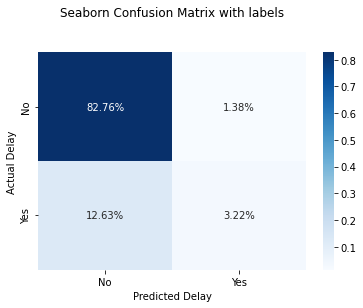

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, roc_auc_score, confusion_matrix
rf_forest_prob = rfc.predict_proba(X_test)
rf_forest_prob = rf_forest_prob[:,1]
print('ROC AUC Score (ROC_AUC) : %.3f'% roc_auc_score(y_test, rf_forest_prob))

print('Model accuracy Score: ', pipe.score(X_test, y_test))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Delay')
ax.set_ylabel('Actual Delay');
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
plt.show()

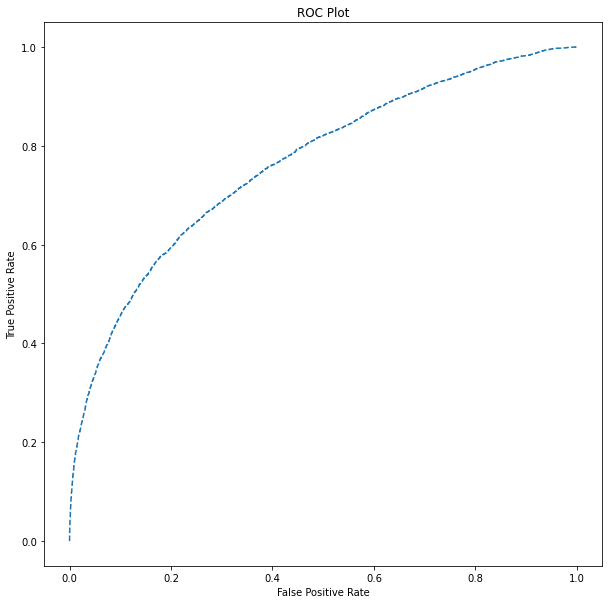

In [26]:
# calculating the ROC Curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rf_forest_prob)
plt.figure(figsize=(10,10))
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label='RandomForestClassifier' % roc_auc_score(y_test, rf_forest_prob))
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()